# EDA and Data Cleaning

#### Basic Data Summaries

In [291]:
import pandas as pd

superstore = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# get a summary of the dataset to check column types and non-null counts
print(superstore.info())

# check basic statistics for numerical columns
print(superstore.describe())

# check for unique values in categorical columns like 'Segment' and 'Category'
print(superstore['Segment'].value_counts())
print(superstore['Category'].value_counts())

# check for missing values
print(superstore.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [292]:
# convert 'Order Date' and 'Ship Date' columns to datetime format
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'])

In [293]:
# check for duplicates in the dataset
duplicates = superstore.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# if duplicates are found, remove them
if duplicates.sum() > 0:
    superstore = superstore.drop_duplicates()

Number of duplicate rows: 0


#### Distribution of Sales, Profit, and Quantity

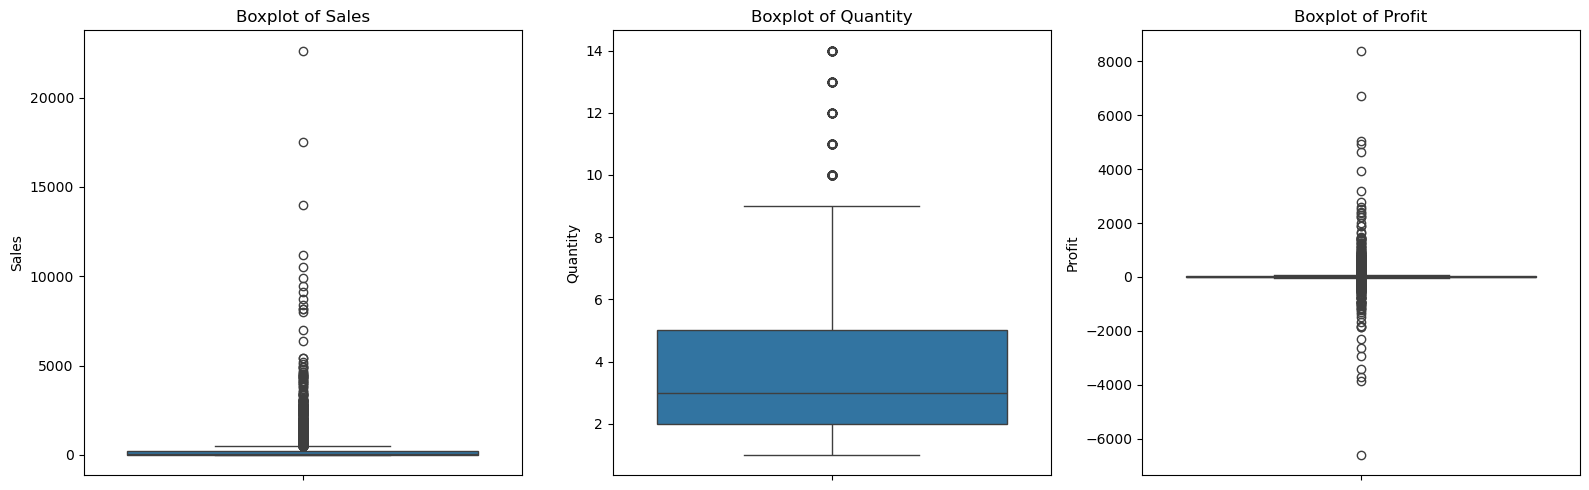

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for better visibility
plt.figure(figsize=(16, 5))

# Plot boxplots for 'Sales', 'Quantity', and 'Profit' columns
for i, column in enumerate(['Sales', 'Quantity', 'Profit'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=superstore[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

#### Histogram of Sales, Quantity, Discount, and Profit

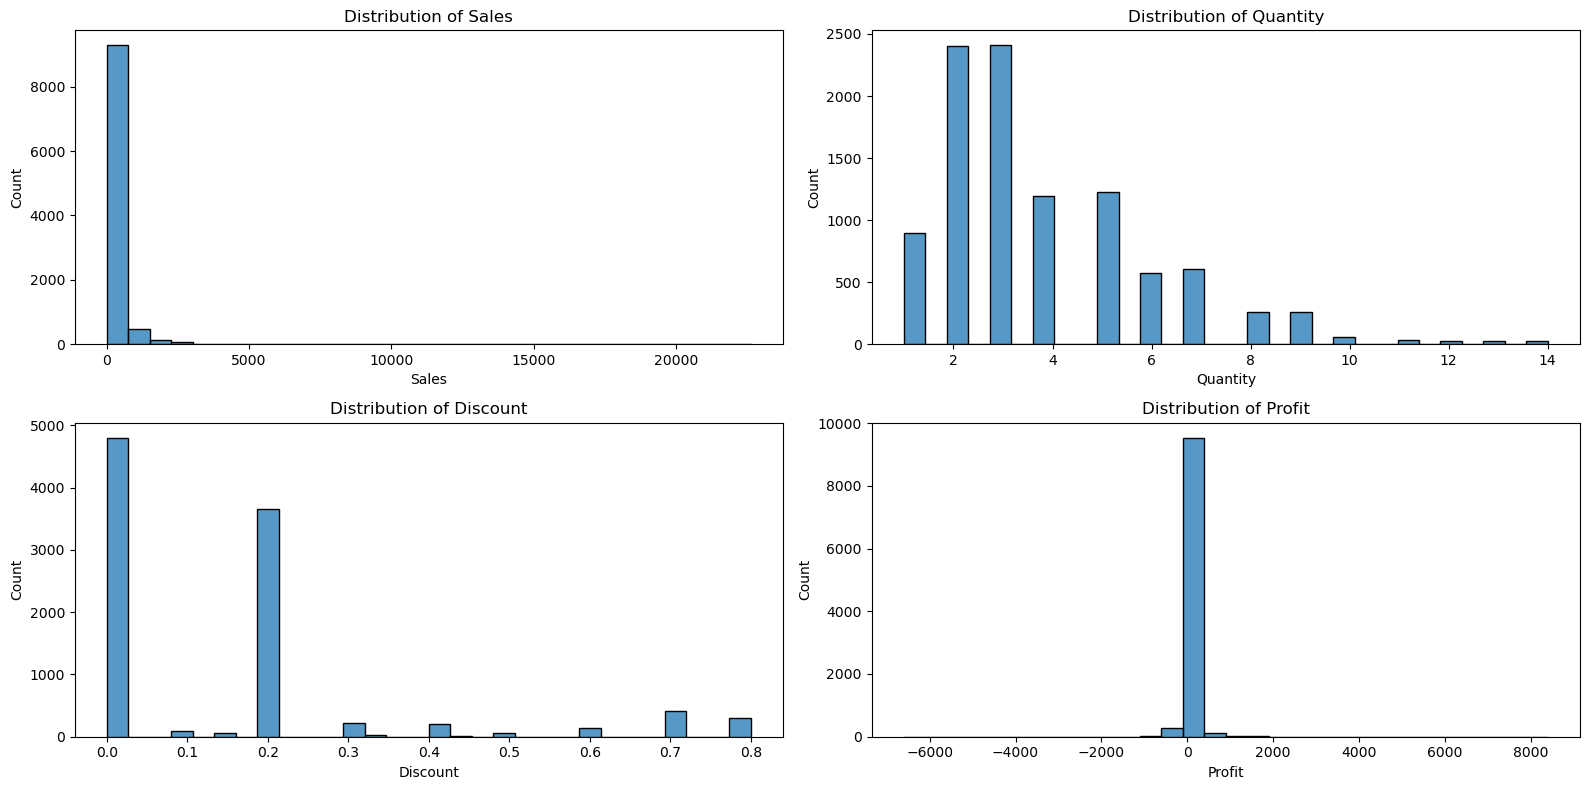

In [295]:
# plot histograms for 'Sales', 'Quantity', 'Discount', and 'Profit'
plt.figure(figsize=(16, 8))
for i, column in enumerate(['Sales', 'Quantity', 'Discount', 'Profit'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(superstore[column], bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

#### Charts for Categorical Variables

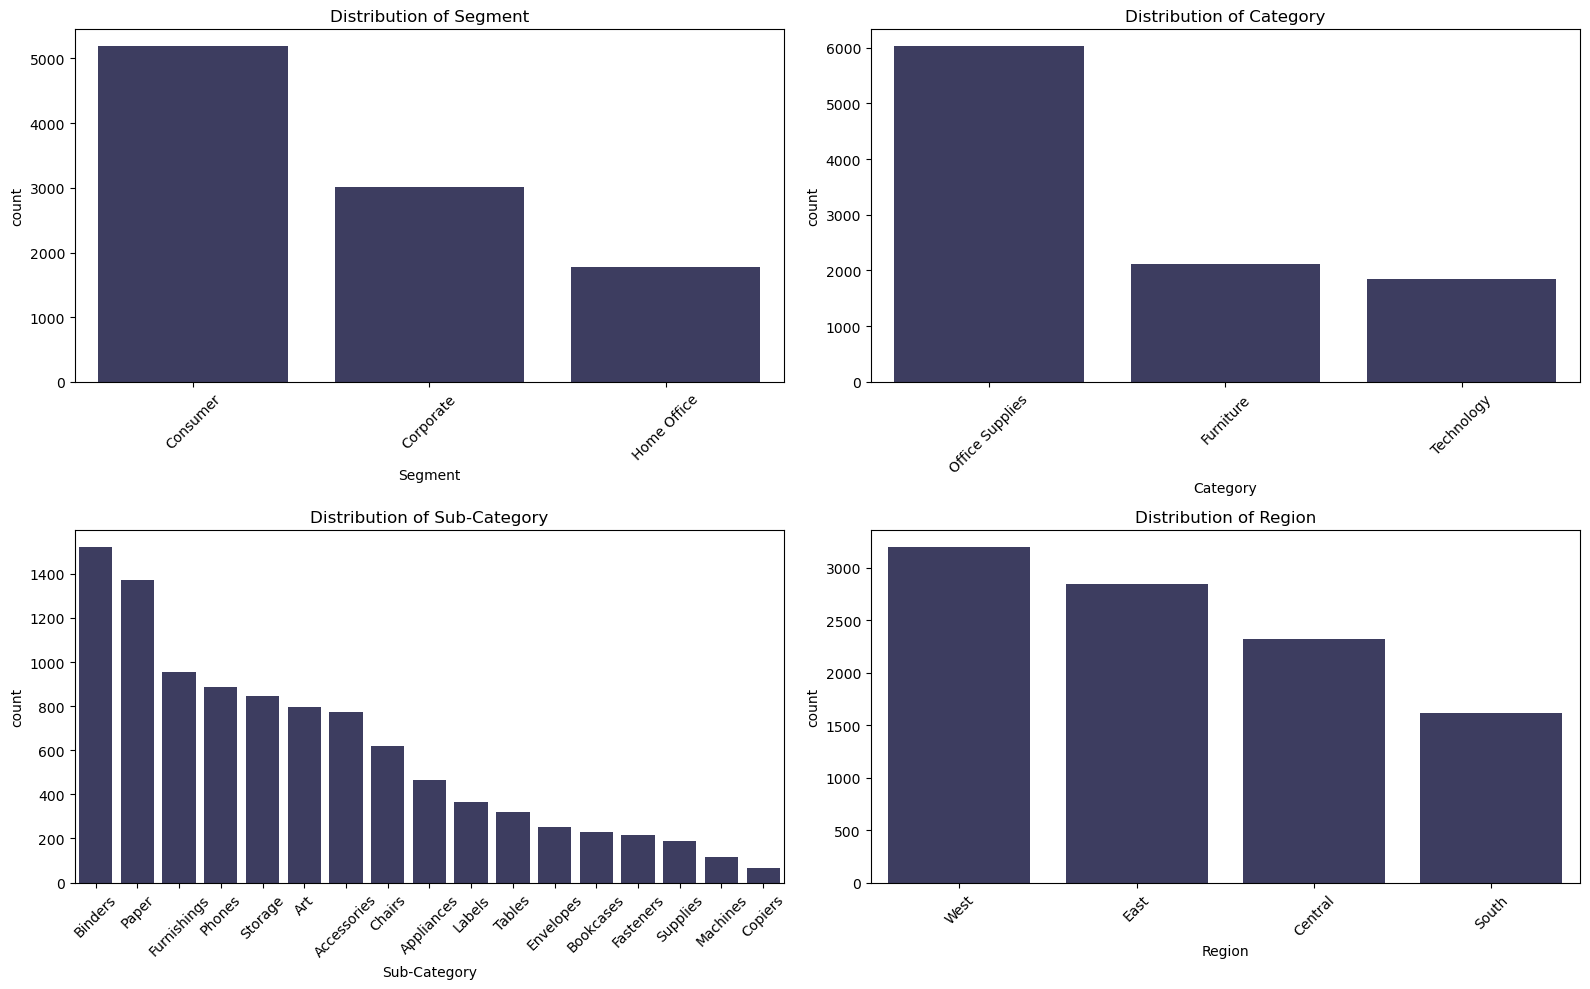

In [296]:
# plot bar charts for 'Segment', 'Category', 'Sub-Category', and 'Region' in descending order
plt.figure(figsize=(16, 10))
for i, column in enumerate(['Segment', 'Category', 'Sub-Category', 'Region'], 1):
    plt.subplot(2, 2, i)
    
    # get counts and sort them in descending order
    sorted_order = superstore[column].value_counts().index
    
    # plot with sorted order
    sns.countplot(data=superstore, x=column, color='#222255', order=sorted_order, legend=False, alpha=0.9)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

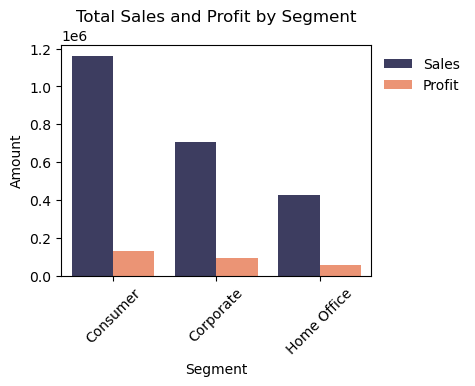

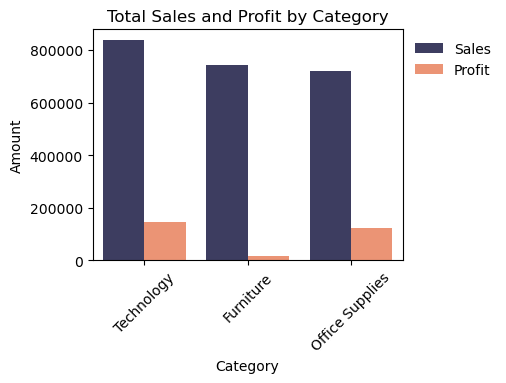

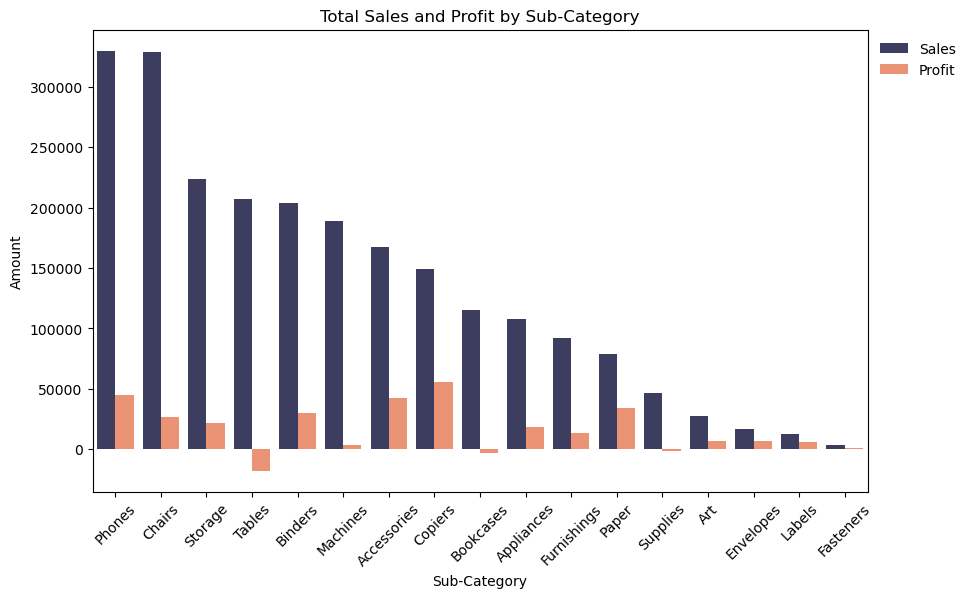

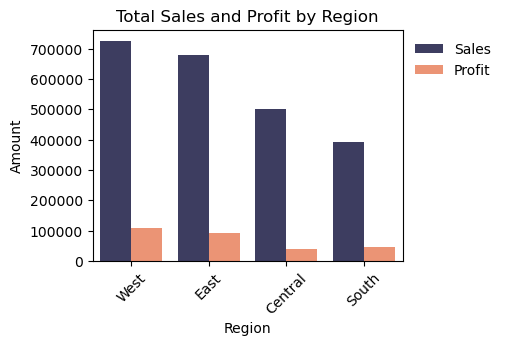

In [297]:
# aggregate Sales and Profit by each category
data = superstore.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()
    
# melt the data so that 'Sales' and 'Profit' can be side by side in the plot
data_melted = data.melt(id_vars='Segment', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Amount')
                        
# plot sales and profit side by side
plt.figure(figsize=(4, 3))
sns.barplot(x='Segment', y='Amount', hue='Metric', data=data_melted, palette=['#222255', '#FF7F50'], alpha=0.9)
plt.title(f'Total Sales and Profit by Segment')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.ylabel('Amount')
plt.xticks(rotation=45)

plt.show()

# aggregate Sales and Profit by each category
data = superstore.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()
    
# melt the data so that 'Sales' and 'Profit' can be side by side in the plot
data_melted = data.melt(id_vars='Category', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Amount')
                        
# plot sales and profit side by side
plt.figure(figsize=(4, 3))
sns.barplot(x='Category', y='Amount',hue='Metric', data=data_melted, palette=['#222255', '#FF7F50'], alpha=0.9)
plt.title(f'Total Sales and Profit by Category')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.ylabel('Amount')
plt.xticks(rotation=45)

plt.show()

# aggregate Sales and Profit by each category
data = superstore.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()
    
# melt the data so that 'Sales' and 'Profit' can be side by side in the plot
data_melted = data.melt(id_vars='Sub-Category', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Amount')
                        
# plot sales and profit side by side
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='Amount',hue='Metric', data=data_melted, palette=['#222255', '#FF7F50'], alpha=0.9)
plt.title(f'Total Sales and Profit by Sub-Category')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.ylabel('Amount')
plt.xticks(rotation=45)

plt.show()

# aggregate Sales and Profit by each category
data = superstore.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).reset_index()
    
# melt the data so that 'Sales' and 'Profit' can be side by side in the plot
data_melted = data.melt(id_vars='Region', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Amount')
                        
# plot sales and profit side by side
plt.figure(figsize=(4, 3))
sns.barplot(x='Region', y='Amount',hue='Metric', data=data_melted, palette=['#222255', '#FF7F50'], alpha=0.9)
plt.title(f'Total Sales and Profit by Region')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
plt.ylabel('Amount')
plt.xticks(rotation=45)

plt.show()

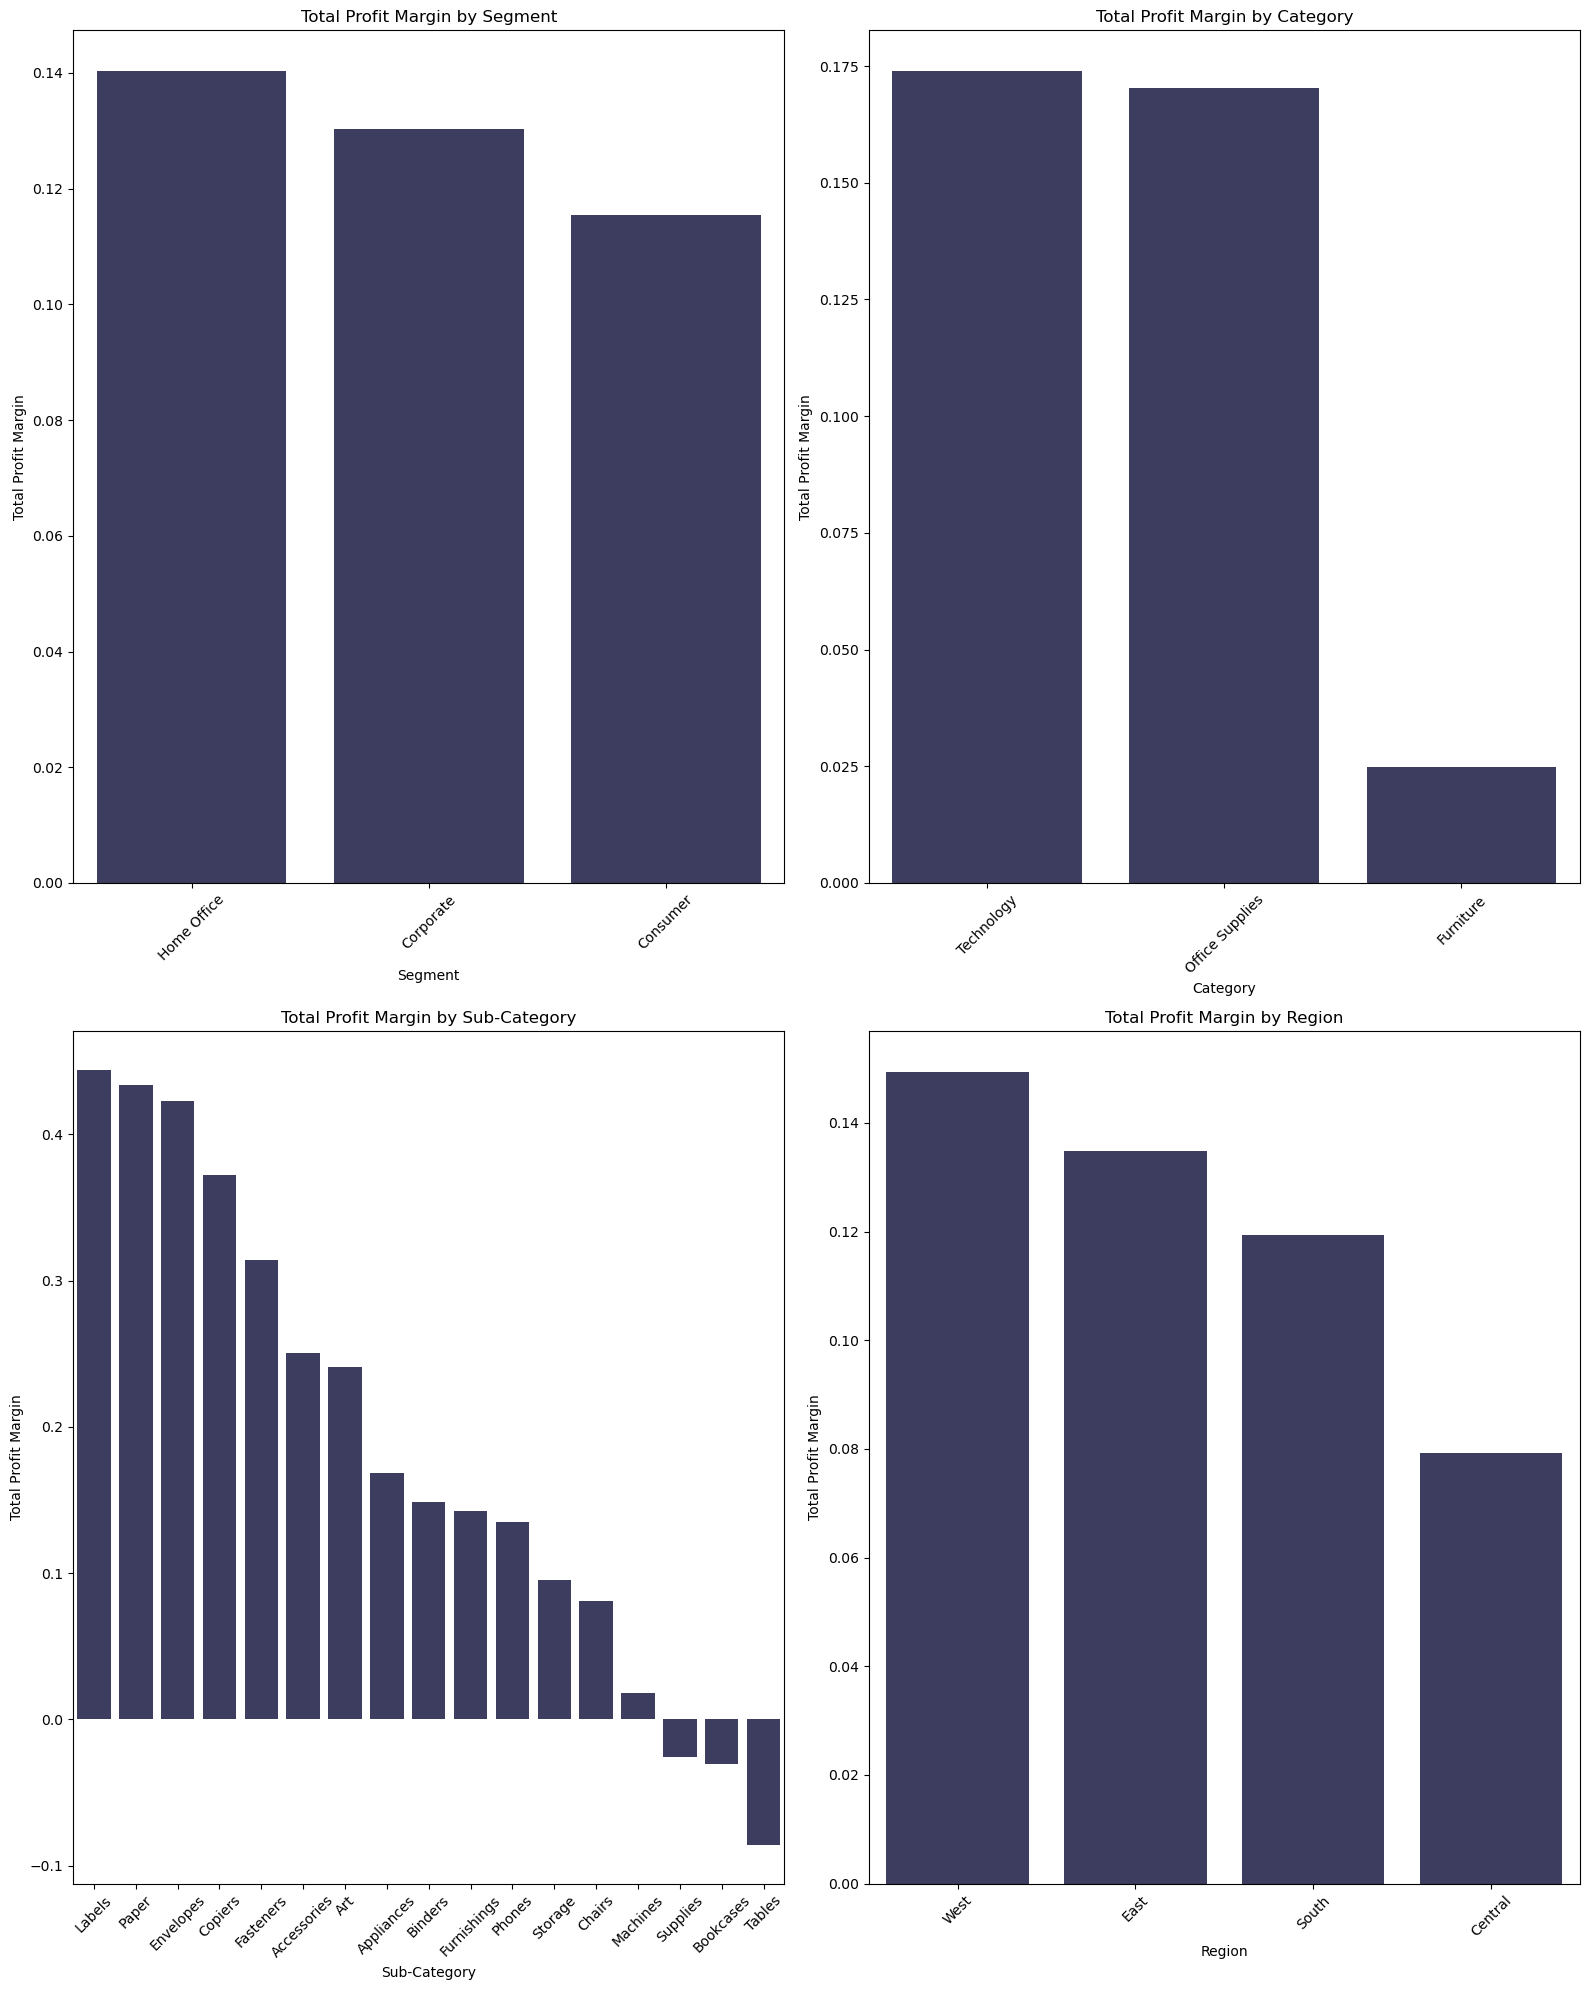

In [298]:
# Define the categorical variables to analyze
categorical_columns = ['Segment', 'Category', 'Sub-Category', 'Region']

# Initialize the plot figure
plt.figure(figsize=(16, 20))

# Loop over each categorical variable
for i, column in enumerate(categorical_columns, 1):
    # Calculate total sales and total profit for each category in the current column
    data = superstore.groupby(column)[['Sales', 'Profit']].sum()
    
    # Calculate total profit margin (Profit / Sales) for each category
    data['Total Profit Margin'] = data['Profit'] / data['Sales']
    
    # Sort values in descending order
    data = data.sort_values(by='Total Profit Margin', ascending=False).reset_index()
    
    # Plot the total profit margin
    plt.subplot(2, 2, i)
    sns.barplot(x=column, y='Total Profit Margin', data=data, color='#222255', alpha=0.9)
    plt.title(f'Total Profit Margin by {column}')
    plt.ylabel('Total Profit Margin')
    plt.xticks(rotation=45)

# Adjust layout for readability
plt.tight_layout()
plt.show()

#### Time-Based Trends

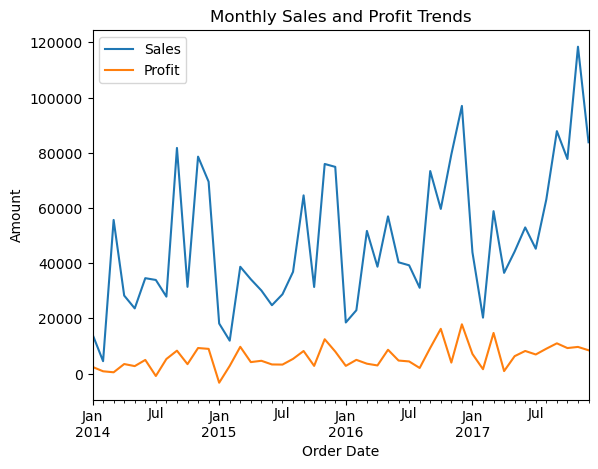

In [299]:
# set Order Date as index for easy resampling
time_trends = superstore[['Order Date', 'Sales', 'Profit']]
time_trends.set_index('Order Date', inplace=True)

# monthly Sales and Profit Trends
monthly_sales_profit = time_trends.resample('ME')[['Sales', 'Profit']].sum()

monthly_sales_profit.plot()
plt.title("Monthly Sales and Profit Trends")
plt.xlabel("Order Date")
plt.ylabel("Amount")

plt.show()

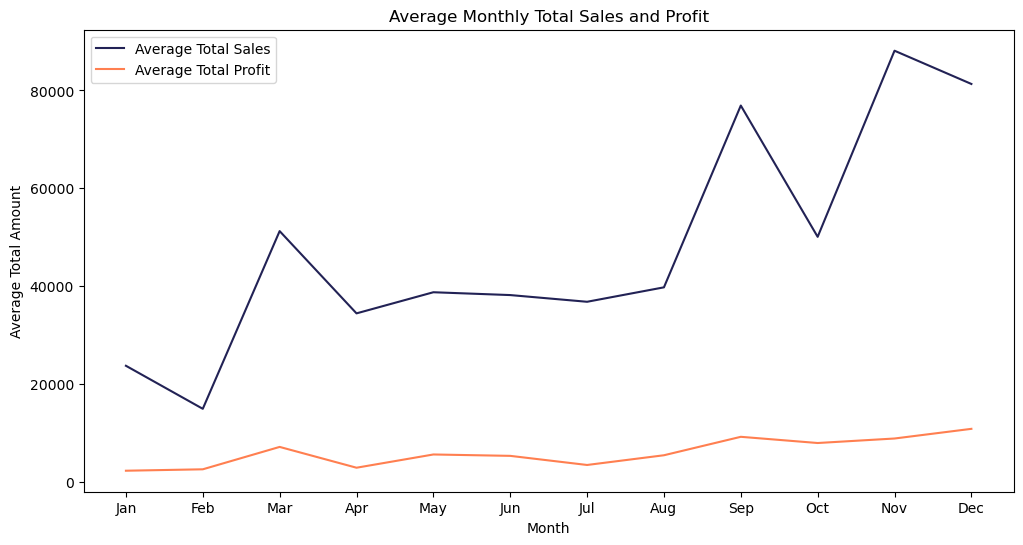

In [300]:
# Ensure 'Order Date' is in datetime format
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])

# Extract month and year from 'Order Date' and add it as a new column for monthly grouping
superstore['Order Month'] = superstore['Order Date'].dt.month
superstore['Order Year'] = superstore['Order Date'].dt.year

# Group by year and month to calculate total sales and profit for each month
monthly_totals = superstore.groupby(['Order Year', 'Order Month'])[['Sales', 'Profit']].sum().reset_index()

# Now, calculate the average monthly sales and profit across the years
average_monthly_data = monthly_totals.groupby('Order Month')[['Sales', 'Profit']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for average monthly total sales
sns.lineplot(x='Order Month', y='Sales', data=average_monthly_data, label='Average Total Sales', color='#222255')

# Line plot for average monthly total profit
sns.lineplot(x='Order Month', y='Profit', data=average_monthly_data, label='Average Total Profit', color='#FF7F50')

# Customize the plot
plt.title('Average Monthly Total Sales and Profit')
plt.xlabel('Month')
plt.ylabel('Average Total Amount')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

plt.show()

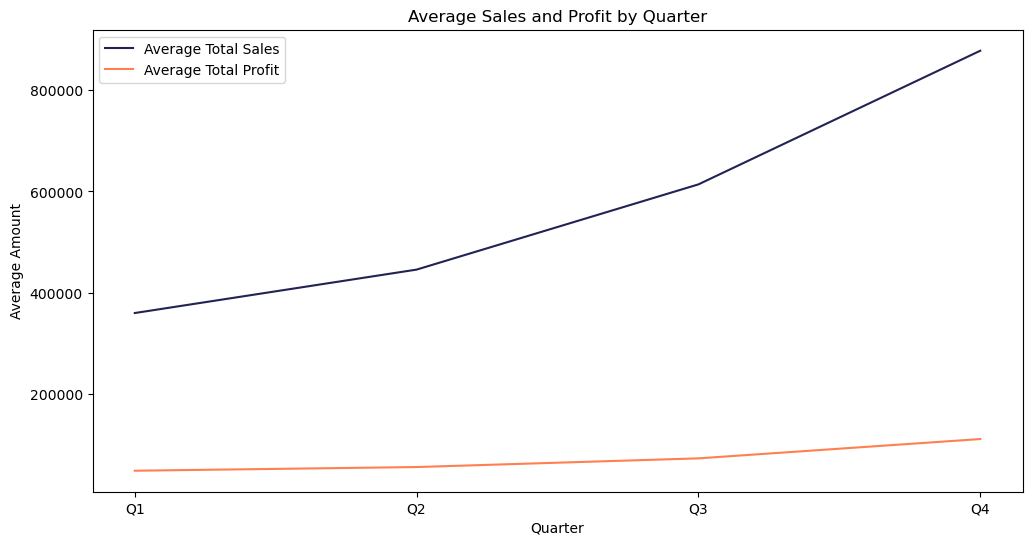

In [301]:
# Extract quarter from 'Order Date' and add it as a new column
superstore['Order Quarter'] = superstore['Order Date'].dt.quarter

# Group by year and month to calculate total sales and profit for each month
monthly_totals = superstore.groupby(['Order Quarter'])[['Sales', 'Profit']].sum().reset_index()

# Now, calculate the average monthly sales and profit across the years
average_monthly_data = monthly_totals.groupby('Order Quarter')[['Sales', 'Profit']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Line plot for average monthly total sales
sns.lineplot(x='Order Quarter', y='Sales', data=average_monthly_data, label='Average Total Sales', color='#222255')

# Line plot for average monthly total profit
sns.lineplot(x='Order Quarter', y='Profit', data=average_monthly_data, label='Average Total Profit', color='#FF7F50')

# Customize the plot
plt.title('Average Sales and Profit by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Amount')
plt.xticks([1, 2, 3, 4], labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend()

plt.show()

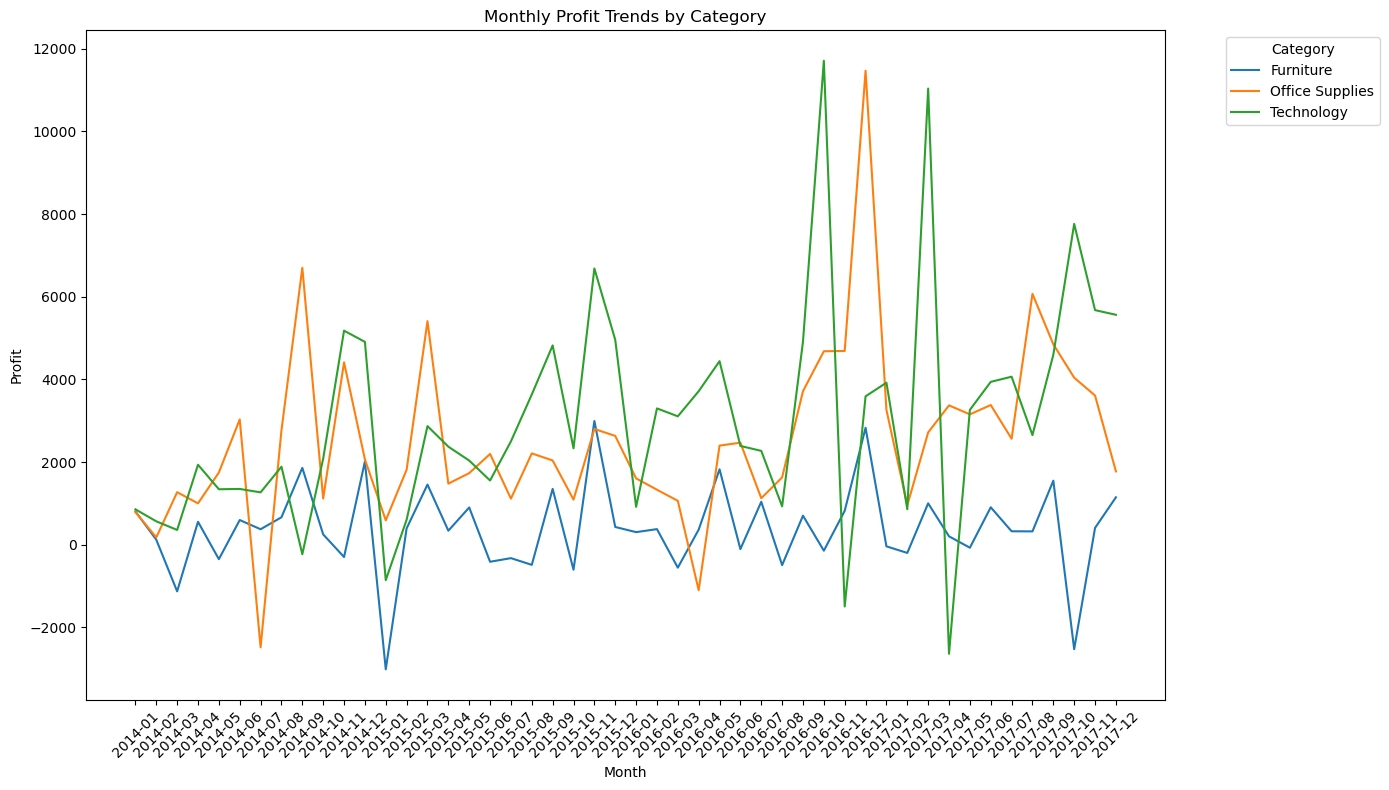

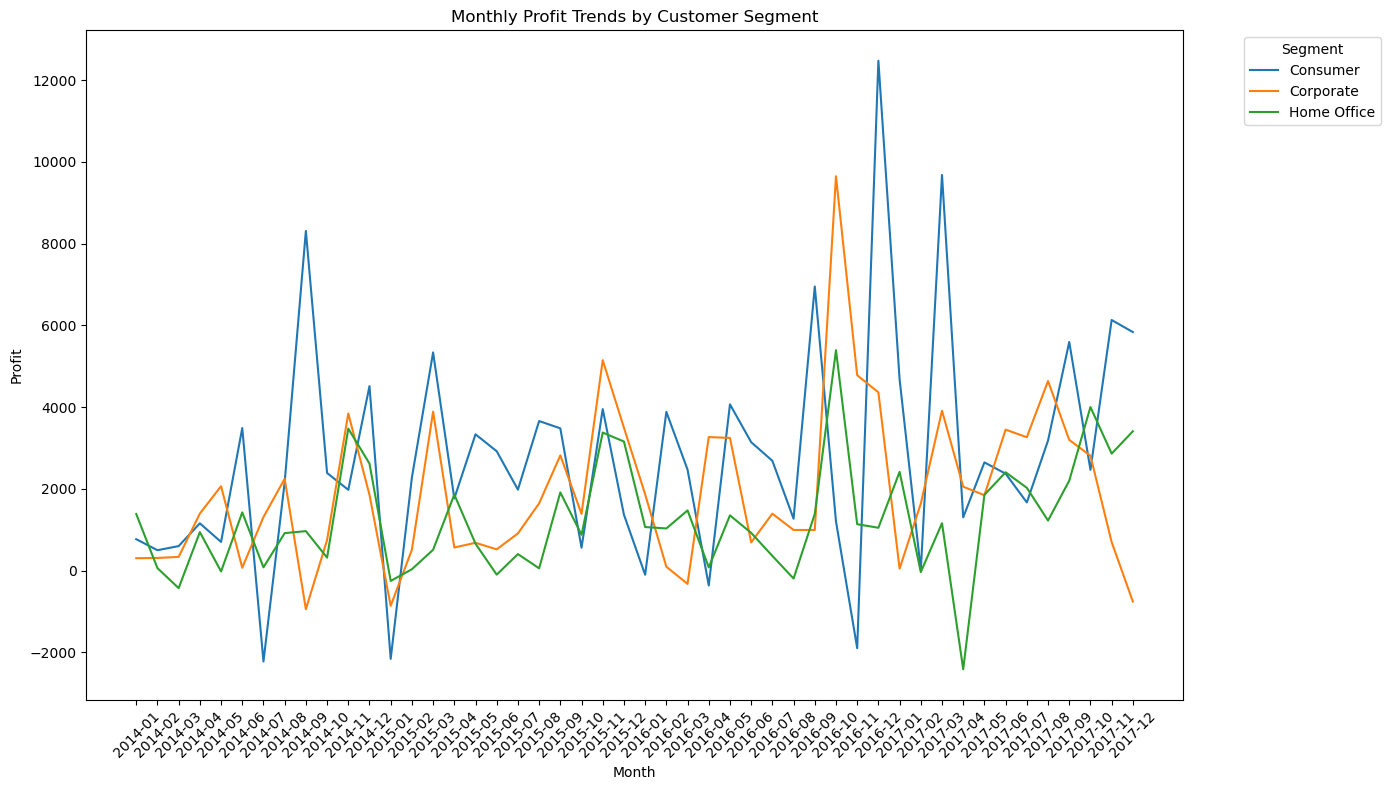

In [307]:
# Convert 'Order Date' to datetime if not already in that format
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])

# Create a new column for month-year
superstore['Order Month'] = superstore['Order Date'].dt.to_period('M')
# Group by 'Category' and 'Order Month' to calculate total profit per category each month
category_monthly_profit = superstore.groupby(['Category', 'Order Month'])['Profit'].sum().unstack().fillna(0)

# Set figure size
plt.figure(figsize=(14, 8))

# Plot profit trend for each category
for category in category_monthly_profit.index:
    plt.plot(category_monthly_profit.columns.astype(str), category_monthly_profit.loc[category], label=category)

# Customize the plot
plt.title('Monthly Profit Trends by Category')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group by 'Segment' and 'Order Month' to calculate total profit per segment each month
segment_monthly_profit = superstore.groupby(['Segment', 'Order Month'])['Profit'].sum().unstack().fillna(0)

# Set figure size
plt.figure(figsize=(14, 8))

# Plot profit trend for each segment
for segment in segment_monthly_profit.index:
    plt.plot(segment_monthly_profit.columns.astype(str), segment_monthly_profit.loc[segment], label=segment)

# Customize the plot
plt.title('Monthly Profit Trends by Customer Segment')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Correlation Analysis

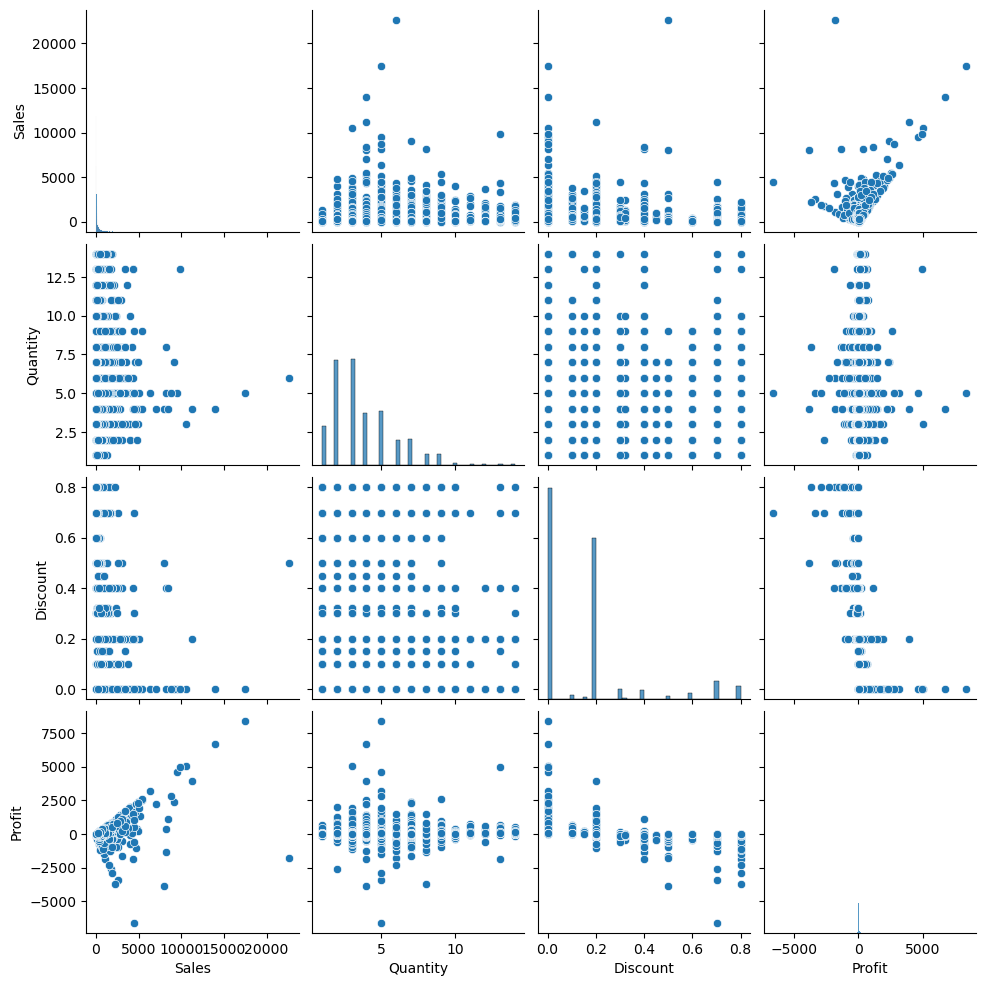

In [302]:
# pairplot for numerical relationships
sns.pairplot(superstore[['Sales', 'Quantity', 'Discount', 'Profit']])
plt.show()

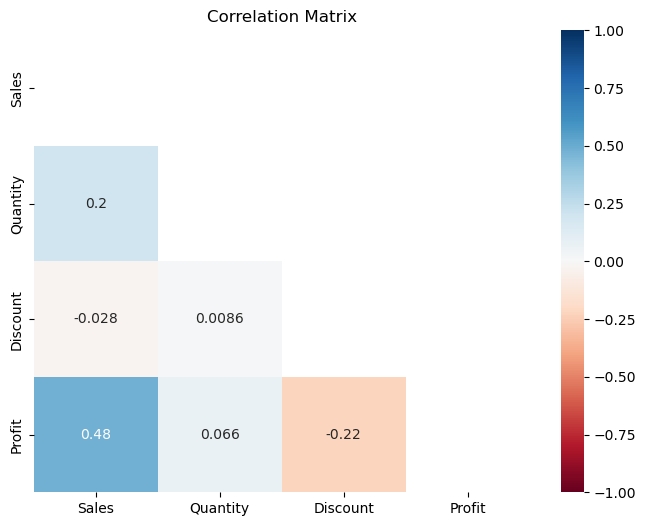

In [303]:
import numpy as np

# correlation heatmap
corr_matrix = superstore[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)), annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

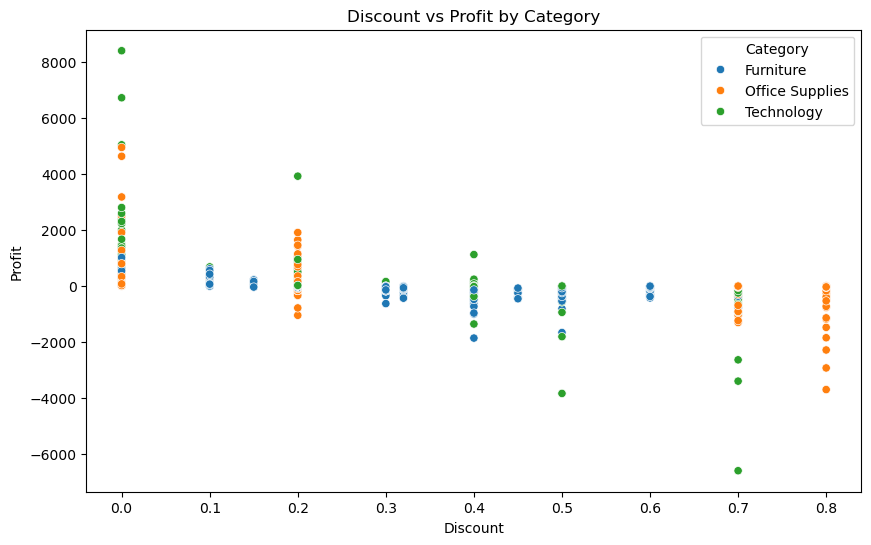

In [304]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=superstore, x='Discount', y='Profit', hue='Category')
plt.title("Discount vs Profit by Category")
plt.show()

#### Product Analysis

In [305]:
# Group by product name and calculate total profit for each product
product_profit = superstore.groupby('Product Name')['Profit'].sum().reset_index()

# Sort products by total profit
most_profitable_products = product_profit.sort_values(by='Profit', ascending=False).head(10)
least_profitable_products = product_profit.sort_values(by='Profit').head(10)

print("Most Profitable Products:")
print(most_profitable_products)

print("\nLeast Profitable Products:")
print(least_profitable_products)

Most Profitable Products:
                                           Product Name      Profit
404               Canon imageCLASS 2200 Advanced Copier  25199.9280
650   Fellowes PB500 Electric Punch Plastic Comb Bin...   7753.0390
805                Hewlett Packard LaserJet 3310 Copier   6983.8836
400                  Canon PC1060 Personal Laser Copier   4570.9347
787   HP Designjet T520 Inkjet Large Format Printer ...   4094.9766
165                   Ativa V4110MDD Micro-Cut Shredder   3772.9461
19     3D Systems Cube Printer, 2nd Generation, Magenta   3717.9714
1276  Plantronics Savi W720 Multi-Device Wireless He...   3696.2820
895                Ibico EPK-21 Electric Binding System   3345.2823
1840                  Zebra ZM400 Thermal Label Printer   3343.5360

Least Profitable Products:
                                           Product Name     Profit
475           Cubify CubeX 3D Printer Double Head Print -8879.9704
985           Lexmark MX611dhe Monochrome Laser Printer -4589.97

In [306]:
# Group by both region and product name to calculate total profit for each product in each region
regional_product_profit = superstore.groupby(['Region', 'Product Name'])['Profit'].sum().reset_index()

# For each region, find the most and least profitable products
most_profitable_by_region = regional_product_profit.sort_values(['Region', 'Profit'], ascending=[True, False]).groupby('Region').head(10)
least_profitable_by_region = regional_product_profit.sort_values(['Region', 'Profit']).groupby('Region').head(10)

print("Most Profitable Products by Region:")
print(most_profitable_by_region)

print("\nLeast Profitable Products by Region:")
print(least_profitable_by_region)

Most Profitable Products by Region:
       Region                                       Product Name      Profit
284   Central              Canon imageCLASS 2200 Advanced Copier   8399.9760
476   Central   GBC Ibimaster 500 Manual ProClick Binding System   3804.9000
280   Central                 Canon PC1060 Personal Laser Copier   2302.9671
634   Central               Ibico EPK-21 Electric Binding System   1700.9910
603   Central  Honeywell Enviracaire Portable HEPA Air Cleane...   1289.7885
636   Central          Ibico Ibimaster 300 Manual Binding System   1159.1685
560   Central  Hewlett Packard 610 Color Digital Copier / Pri...   1074.9785
278   Central                 Canon Imageclass D680 Copier / Fax    874.9875
753   Central                     Maxell iVDR EX 500GB Cartridge    829.3754
281   Central                      Canon PC1080F Personal Copier    803.9866
1606     East              Canon imageCLASS 2200 Advanced Copier  10079.9712
1422     East                  Ativa V41

###

In [308]:
# Filter for orders where Discount > 0.2 and Profit < 0
discounted_loss_orders = superstore[(superstore['Discount'] > 0.2) & (superstore['Profit'] < 0)]

# Customers with at least one discounted loss order
discounted_loss_customers = discounted_loss_orders['Customer ID'].unique()

# Calculate total profit per customer and then the average
customer_profit = superstore.groupby('Customer ID')['Profit'].sum()
profitable_customers = customer_profit[customer_profit > 0]

# Average overall profit for customers with at least one discounted loss order
avg_profit_discounted_loss_customers = customer_profit[customer_profit.index.isin(discounted_loss_customers)].mean()

# Average overall profit for all customers
avg_profit_all_customers = customer_profit.mean()

# Identify customers with a total profit > 0 among those with discounted loss orders
profitable_discounted_loss_customers = customer_profit[customer_profit.index.isin(discounted_loss_customers) & (customer_profit > 0)]
percentage_profitable_discounted_loss_customers = (len(profitable_discounted_loss_customers) / len(discounted_loss_customers)) * 100

# Identify the earliest order date for discounted loss orders per customer
earliest_discounted_loss_orders = discounted_loss_orders.groupby('Customer ID')['Order Date'].min()

# Merge the earliest discounted loss order date with the full dataset
superstore = superstore.merge(earliest_discounted_loss_orders, on='Customer ID', how='left', suffixes=('', '_discounted_loss'))

# Filter for customers with a later order after their discounted loss order
repeat_customers = superstore[(superstore['Order Date'] > superstore['Order Date_discounted_loss']) & 
                              (superstore['Customer ID'].isin(discounted_loss_customers))]['Customer ID'].unique()

percentage_repeat_discounted_loss_customers = (len(repeat_customers) / len(discounted_loss_customers)) * 100

print(f"Average overall profit of customers with discounted loss orders: ${avg_profit_discounted_loss_customers:.2f}")
print(f"Average overall profit of all customers: ${avg_profit_all_customers:.2f}")
print(f"Percentage of discounted loss customers who were profitable: {percentage_profitable_discounted_loss_customers:.2f}%")
print(f"Percentage of all customers who were profitable: {(len(profitable_customers)/len(customer_profit) * 100):.2f}%")
print(f"Percentage of discounted loss customers who made another purchase: {percentage_repeat_discounted_loss_customers:.2f}%")

Average overall profit of customers with discounted loss orders: $285.66
Average overall profit of all customers: $361.16
Percentage of discounted loss customers who were profitable: 73.84%
Percentage of all customers who were profitable: 80.45%
Percentage of discounted loss customers who made another purchase: 89.25%
